# То, что удалось выцепить с cifar10 из беглых обзоров видео и приложенных материалов.

In [6]:
from __future__ import print_function
import keras # расскоментируйте эту строку, чтобы начать обучение
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import keras.optimizers

In [2]:
# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 1
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [3]:
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

170498071/170498071 [==============================] - 3s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [4]:
# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
# конфигурирование слоев нейросети
model = Sequential()
# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [6]:
# инициализация RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)

In [7]:
# компиляция модели
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [8]:
if not data_augmentation:
  print('Не используется data augmentation')
  model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)
else:
  print('Использование data augmentation в реальном времени')
  # Препроцессинг и data augmentation в реальном времени:
  datagen = ImageDataGenerator(
  featurewise_center=False,
  samplewise_center=False,
  featurewise_std_normalization=False,
  samplewise_std_normalization=False,
  zca_whitening=False,
  zca_epsilon=1e-06,
  rotation_range=0,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.,
  zoom_range=0.,
  channel_shift_range=0.,
  fill_mode='nearest',
  cval=0.,
  horizontal_flip=True,
  vertical_flip=False,
  rescale=None,
  preprocessing_function=None,
  data_format=None,
  validation_split=0.0)

Использование data augmentation в реальном времени


In [9]:
# запуск data augmentation через fit_generator
model.fit_generator(datagen.flow(x_train, y_train,
batch_size=batch_size),
epochs=epochs,
validation_data=(x_test, y_test),
workers=4)

<ipython-input-9-9feba6964c21>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(x_train, y_train,


1563/1563 [==============================] - 47s 25ms/step - loss: 1.8497 - accuracy: 0.3150 - val_loss: 1.5293 - val_accuracy: 0.4370


In [10]:
# сохранение модели и весов
if not os.path.isdir(save_dir):
  os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

сохранить обученную модель как /content/saved_models/keras_cifar10_trained_model.h5 


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.5293 - accuracy: 0.4370
Test loss: 1.5293173789978027
Test accuracy: 0.43700000643730164


Точность меньше 50% (43,7%)- "посмотри, что предсказала сеть - и выбери наоборот!"
Конечно шутка, категорий то 10, но всё же... так себе точность.

## Обработка датасета cifar10 при помощи готовой нейронной сети ResNet50.

In [16]:
!pip install tensorflow-datasets

In [12]:
# Установка параметров нейросети
batch_size = 32
num_classes = 1000
epochs = 18

In [13]:
# Загрузка данных cifar10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# Создание объекта ImageDataGenerator для аугментации данных
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [14]:
# Создание генераторов для обучающей и тестовой выборок
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)
test_generator = datagen.flow(x_test, y_test, batch_size=batch_size)

Нехватало библиотек в оригинальном коде!!!

In [7]:
import tensorflow as tf
import keras.applications.resnet50 as rs50
from keras.layers import GlobalAveragePooling2D

In [21]:
# Создание предварительно обученной модели ResNet50
base_model = rs50.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 [==============================] - 0s 0us/step


In [25]:
# Создание модели для Featurization
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))

# Компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
model.fit_generator(train_generator,
                    steps_per_epoch=len(x_train) // batch_size,
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=len(x_test) // batch_size)

# Оценка производительности модели на тестовых данных
score = model.evaluate_generator(test_generator, steps=len(x_test) // batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/18


<ipython-input-26-14e1ba4302b7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


1562/1562 [==============================] - 108s 47ms/step - loss: 76998.1094 - accuracy: 0.0017 - val_loss: 183720.7812 - val_accuracy: 0.0000e+00
Epoch 2/18
1562/1562 [==============================] - 71s 46ms/step - loss: 147198.4531 - accuracy: 0.0000e+00 - val_loss: 192265.5312 - val_accuracy: 0.0000e+00
Epoch 3/18
1562/1562 [==============================] - 70s 45ms/step - loss: 204020.2812 - accuracy: 0.0000e+00 - val_loss: 204373.2969 - val_accuracy: 0.0000e+00
Epoch 4/18
1562/1562 [==============================] - 78s 50ms/step - loss: 252449.3438 - accuracy: 0.0000e+00 - val_loss: 271690.3438 - val_accuracy: 0.0000e+00
Epoch 5/18
1562/1562 [==============================] - 82s 53ms/step - loss: 300791.5312 - accuracy: 0.0000e+00 - val_loss: 358588.8750 - val_accuracy: 0.0000e+00
Epoch 6/18
1562/1562 [==============================] - 77s 49ms/step - loss: 352438.5000 - accuracy: 0.0000e+00 - val_loss: 302927.3750 - val_accuracy: 0.0000e+00
Epoch 7/18
1562/1562 [=========

<ipython-input-26-14e1ba4302b7>:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, steps=len(x_test) // batch_size)


Test loss: 721572.875
Test accuracy: 0.0


Полный отстой!!! Вообще ничему не обучилась.

ТОТ же код, что и вышеописанный, с изменением количества эпох, батчей, оптимизатора, ошибки.

In [27]:
# Установка параметров нейросети
batch_size = 64
num_classes = 1000
epochs = 4

In [28]:
# Создание модели для Featurization
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))

# Компиляция модели
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [29]:
model.fit_generator(train_generator,
                    steps_per_epoch=len(x_train) // batch_size,
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=len(x_test) // batch_size)

Epoch 1/4


<ipython-input-29-8d3e895eb60f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


781/781 [==============================] - 48s 42ms/step - loss: 105483.0391 - accuracy: 0.0923 - val_loss: 261256.1562 - val_accuracy: 0.0000e+00
Epoch 2/4
781/781 [==============================] - 32s 42ms/step - loss: 60370.5977 - accuracy: 0.0973 - val_loss: 316405.4375 - val_accuracy: 0.0000e+00
Epoch 3/4
781/781 [==============================] - 33s 42ms/step - loss: 43384.8438 - accuracy: 0.0994 - val_loss: 23503.3281 - val_accuracy: 0.0000e+00
Epoch 4/4
781/781 [==============================] - 32s 40ms/step - loss: 35080.6875 - accuracy: 0.0992 - val_loss: 36847.4414 - val_accuracy: 0.4447


In [30]:
# Оценка производительности модели на тестовых данных
score = model.evaluate_generator(test_generator, steps=len(x_test) // batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

<ipython-input-30-e5744145ecd9>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, steps=len(x_test) // batch_size)


Test loss: 36367.8203125
Test accuracy: 0.4328926205635071


При сравнительно равной (и достаточно низкой) точности, уровень потерь у первой модели значительно ниже. И скорость работы первой сети значительно выше.<br>
Есть подозрения, что низкая точность, и долгая работа второй и третьей моделей связана с количеством классов num_classes = 1000. В описании сказано, что их 10. Правда третья модель как-то всё же вычленила что-то на последней( четвёртой) эпохе. Возможно, был шанс повысить точность увеличением эпох - потери на обучении падали, а на тесте, хоть и огромные, но не росли явно.

Исходя из анализа, можно сделать вывод о сложности выработки четких правил установки соотношения параметров для достижения наилучших показателей при использовании нейросетей. Также, можно сказать, что сети ResNet50 и ResNet50V2, по всей видимости, не очень подходят для обработки датасета Cifar10 (у обеих схожие результаты на низком уровне). Лучшие показатели, тем не менее, были обеспечены при использовании функции loss - sparse_categorical_crossentropy (без данной функции модель вообще ничего не могла классифицировать), optimizer - SGD и batch_size = 64. Также сеть фактически не обучалась и метрика accuracy колебалась на протяжении 25 эпох (при различных параметрах сети) от 9 до 15 % и, по сути, зависела от конкретного фрагмента датасета направляемого на тест.

# 2. Опишите в анализе, какие изменения необходимо было бы внести в получившуюся нейронную сеть, если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET

Для адаптации модели для MNIST надо уменьшить заявленный размер входных картинок, переделать на "односцетную" модель (1 вместо 3), можно существенно сократить количество слоёв - точность останется достаточно высокой.<br>
Для CIFAR-100 и ImageNet увеличить количество категорий, а для ImageNet ещё и размер картинок.

### Для адаптации нейронной сети для работы с другими наборами данных, такими как MNIST, CIFAR100 и ImageNet, можно внести следующие изменения:
1. Выбор архитектуры: В зависимости от сложности задачи и характеристик набора данных, необходимо выбрать соответствующую архитектуру нейронной сети. Например, для MNIST можно использовать более простую архитектуру, такую как LeNet, в то время как для CIFAR-100 или ImageNet потребуются более сложные архитектуры, такие как ResNet или VGG.
2. Количество и размер слоев: Количество и размер слоев в нейронной сети также могут быть изменены в зависимости от сложности набора данных. Для более сложных наборов данных, таких как CIFAR-100 или ImageNet, может потребоваться большее количество слоев и более высокая степень абстракции, тогда как для MNIST можно обойтись меньшим количеством слоёв.
3. Размер входного представления: Размер входного представления также должен быть изменен в соответствии с размером и форматом входных данных. Например, размер изображения в MNIST составляет 28x28 пикселей, в то время как размер изображения в CIFAR-100 составляет 32x32 пикселей, а в ImageNet - около 224x224 пикселей.
4. Объем обучающих данных: Объем обучающего набора также может влиять на точность и производительность модели. Для сложных наборов данных может потребоваться больше обучающих данных для обеспечения более точной модели.
5. Параметр регуляризации: Параметр регуляризации, такой как L1- или L2-регуляризация, также может быть изменен для предотвращения переобучения модели. Увеличение параметра регуляризации может привести к более общей модели, но с меньшей точностью.
5. Оптимизация гиперпараметров: Гиперпараметры, такие как скорость обучения и коэффициент регуляризации, должны быть оптимизированы для достижения наилучшей точности модели. Это может потребовать проведения нескольких экспериментов с различными значениями гиперпараметров и выбора тех, которые обеспечивают наилучшие результаты.<br>
В целом, адаптация нейронной сети к другим наборам данных требует некоторой итерации и экспериментации с различными архитектурами, гиперпараметрами и параметрами регуляризации для достижения оптимальных результатов.

## А теперь попробуем улучшить результат!

In [8]:
# установка параметров нейросети
data_augmentation = True
num_predictions = 20
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')
# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170498071/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [9]:
# конфигурирование слоев нейросети
model = Sequential()
# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [10]:
# инициализация RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)

In [11]:
# компиляция модели
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [14]:
batch_size = 64
epochs = 10
if not data_augmentation:
  print('Не используется data augmentation')
  model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)
else:
  print('Использование data augmentation в реальном времени')
  # Препроцессинг и data augmentation в реальном времени:
  datagen = ImageDataGenerator(
  featurewise_center=False,
  samplewise_center=False,
  featurewise_std_normalization=False,
  samplewise_std_normalization=False,
  zca_whitening=False,
  zca_epsilon=1e-06,
  rotation_range=0,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.,
  zoom_range=0.,
  channel_shift_range=0.,
  fill_mode='nearest',
  cval=0.,
  horizontal_flip=True,
  vertical_flip=False,
  rescale=None,
  preprocessing_function=None,
  data_format=None,
  validation_split=0.0)

Использование data augmentation в реальном времени


In [15]:
# запуск data augmentation через fit_generator
model.fit_generator(datagen.flow(x_train, y_train,
batch_size=batch_size),
epochs=epochs,
validation_data=(x_test, y_test),
workers=4)

Epoch 1/10


<ipython-input-15-9feba6964c21>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(x_train, y_train,


782/782 [==============================] - 271s 346ms/step - loss: 1.6391 - accuracy: 0.4019 - val_loss: 1.4515 - val_accuracy: 0.4756
Epoch 2/10
782/782 [==============================] - 269s 344ms/step - loss: 1.5364 - accuracy: 0.4440 - val_loss: 1.4014 - val_accuracy: 0.5027
Epoch 3/10
782/782 [==============================] - 303s 388ms/step - loss: 1.4703 - accuracy: 0.4690 - val_loss: 1.3047 - val_accuracy: 0.5326
Epoch 4/10
782/782 [==============================] - 301s 385ms/step - loss: 1.4116 - accuracy: 0.4884 - val_loss: 1.2963 - val_accuracy: 0.5356
Epoch 5/10
782/782 [==============================] - 263s 336ms/step - loss: 1.3639 - accuracy: 0.5108 - val_loss: 1.2654 - val_accuracy: 0.5497
Epoch 6/10
782/782 [==============================] - 283s 361ms/step - loss: 1.3175 - accuracy: 0.5306 - val_loss: 1.1782 - val_accuracy: 0.5819
Epoch 7/10
782/782 [==============================] - 274s 350ms/step - loss: 1.2810 - accuracy: 0.5446 - val_loss: 1.1642 - val_accura

In [16]:
# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 13s 40ms/step - loss: 1.1188 - accuracy: 0.6092
Test loss: 1.1188431978225708
Test accuracy: 0.6092000007629395


In [17]:
model.save('model_best.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Удалось существенно повысить точность (примерно в 1,5 раза) и на столько же снизить потери. Десятая эпоха - была лишней.<br>
Есть ещё идеи для экспериментов с разными моделями, но время с графическим движком кочилось, а часами ждать результаты...

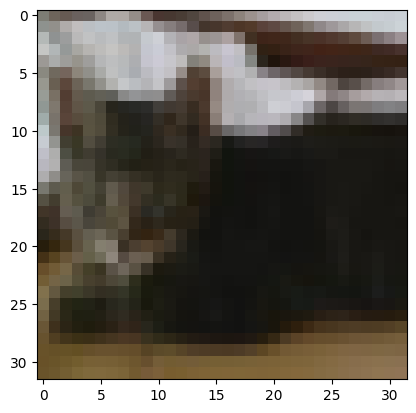

In [30]:
import matplotlib.pyplot as plt
plt.imshow(x_train[i])
plt.show()

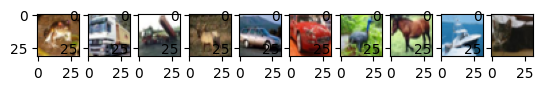

In [29]:
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i])
plt.show()

Что тут вообще можно распознать?